# Ahmad Atalaraya.S
# 202131033

## Regresi (3) : Excercises

In [1]:
import numpy as np #Mengimpor pustaka NumPy dan memberi alias sebagai np.
import pandas as pd #Mengimpor pustaka Pandas dan memberi alias sebagai pd. 
from matplotlib import pyplot as plt #Mengimpor modul pyplot dari pustaka Matplotlib.
from sklearn.linear_model import LinearRegression #Mengimpor model regresi linear dari pustaka scikit-learn. 

In [2]:
df = pd.read_csv ('R03_excercises.csv') #Membaca data dari file CSV 
df.columns = ['X','Y'] #Mengganti nama kolom DataFrame df menjadi 'X' dan 'Y'.
df #Menampilkan DataFrame df.

,X,Y
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


In [3]:
df.corr() #Panggilan metode pada DataFrame Pandas yang menghitung korelasi antar kolom dalam DataFrame tersebut.

,X,Y
X,1.000000,0.990064
Y,0.990064,1.000000


In [4]:
x_train = df['X'].values[:,np.newaxis] #Memilih kolom 'X' dari DataFrame df dan mengonversinya menjadi array NumPy dengan menggunakan values. 
y_train = df['Y'].values #Memilih kolom 'Y' dari DataFrame df dan mengonversinya menjadi array NumPy.

In [5]:
print(x_train) #mencetak nilai dari x_train

[[0.5]
 [1. ]
 [1.5]
 [2. ]
 [1. ]
 [2.5]
 [3. ]
 [2. ]
 [0.7]
 [3.5]
 [1.2]
 [2.8]
 [0.9]
 [3.2]
 [1.6]
 [0.4]
 [2.6]
 [1.1]
 [3.8]
 [2.5]
 [2. ]
 [1.3]
 [3.7]
 [1.4]
 [3.9]
 [2.3]
 [1.5]
 [2.9]
 [1. ]
 [0.6]
 [3. ]
 [2.7]
 [1.9]
 [1.8]
 [2.4]
 [0.8]
 [3.4]
 [2.1]
 [2.2]
 [1.2]
 [3.5]
 [3.1]
 [1.3]
 [3.6]
 [2.6]
 [2.7]
 [0.5]
 [3.9]
 [1.4]
 [0.7]
 [3.2]
 [2.8]
 [1.1]
 [3.3]
 [2. ]
 [0.9]
 [2.2]
 [2.5]
 [0.6]
 [3.7]
 [1.7]
 [1.5]
 [3.8]
 [2.4]
 [3. ]
 [0.8]
 [2.3]
 [2.9]
 [1.6]
 [3.6]
 [1.8]
 [1.9]
 [3.4]
 [1. ]]


In [6]:
#membuat objek model regresi linear (lm) menggunakan LinearRegression dari scikit-learn dan melatihnya menggunakan data latihan (x_train dan y_train). 
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [7]:
print('Coefficient : ' + str(lm.coef_)) #mencetak koefisien regresi 
print('Intercept : ' + str(lm.intercept_)) #mencetak 

#mencetak koefisien kemiringan dari garis regresi
#menggambarkan hubungan ;inear antar variabel 'x' dan 'y' dalam model regresi

Coefficient : [0.55070483]
Intercept : -0.1685243049391052


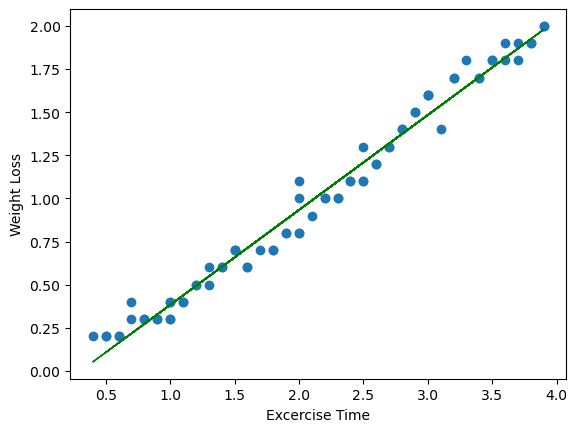

In [8]:
#prepare plot
pb = lm.predict(x_train)
dfc = pd.DataFrame({'X': df['X'],'Y':pb})
plt.scatter(df['X'],df['Y'])
plt.plot(dfc['X'],dfc['Y'],color='green',linewidth=1)
plt.xlabel('Excercise Time')
plt.ylabel('Weight Loss')
plt.show()

## Tree (4)
## Klasifikasi: Bank Customers

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier ,  plot_tree #DecisionTreeClassifier  (model)

In [10]:
df = pd.read_csv ('K04_bank_customers.csv', sep=';')  #y indepandent x dependent
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
df.replace({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,married,tertiary,no,2143,yes,no,4,5,may,261,1,-1,0,4,no
1,44,1,single,secondary,no,29,yes,no,4,5,may,151,1,-1,0,4,no
2,33,2,married,secondary,no,2,yes,yes,4,5,may,76,1,-1,0,4,no
3,47,3,married,4,no,1506,yes,no,4,5,may,92,1,-1,0,4,no
4,33,4,single,4,no,1,no,no,4,5,may,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,4,yes
45207,71,5,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,4,yes
45208,72,5,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,4,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [17]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
df.replace({'married':1, 'single':2, 'divorced':3}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,tertiary,no,2143,yes,no,4,5,may,261,1,-1,0,4,no
1,44,1,2,secondary,no,29,yes,no,4,5,may,151,1,-1,0,4,no
2,33,2,1,secondary,no,2,yes,yes,4,5,may,76,1,-1,0,4,no
3,47,3,1,4,no,1506,yes,no,4,5,may,92,1,-1,0,4,no
4,33,4,2,4,no,1,no,no,4,5,may,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,4,yes
45207,71,5,3,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,4,yes
45208,72,5,1,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,4,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(9), object(8)
memory usage: 5.9+ MB


In [20]:
df['education'].unique()

array(['tertiary', 'secondary', 4, 'primary'], dtype=object)

In [21]:
df.replace({'tertiary':1, 'secondary':2, 'unknown':3, 'primary':4}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,1,no,2143,yes,no,4,5,may,261,1,-1,0,4,no
1,44,1,2,2,no,29,yes,no,4,5,may,151,1,-1,0,4,no
2,33,2,1,2,no,2,yes,yes,4,5,may,76,1,-1,0,4,no
3,47,3,1,4,no,1506,yes,no,4,5,may,92,1,-1,0,4,no
4,33,4,2,4,no,1,no,no,4,5,may,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,1,no,825,no,no,cellular,17,nov,977,3,-1,0,4,yes
45207,71,5,3,4,no,1729,no,no,cellular,17,nov,456,2,-1,0,4,yes
45208,72,5,1,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,1,2,no,668,no,no,telephone,17,nov,508,4,-1,0,4,no


In [22]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [24]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df['contact'].unique()

array([4, 'cellular', 'telephone'], dtype=object)

In [27]:
df.replace({'unknown':1, 'cellular':2, 'telephone':3}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,1,no,2143,yes,no,4,5,may,261,1,-1,0,4,no
1,44,1,2,2,no,29,yes,no,4,5,may,151,1,-1,0,4,no
2,33,2,1,2,no,2,yes,yes,4,5,may,76,1,-1,0,4,no
3,47,3,1,4,no,1506,yes,no,4,5,may,92,1,-1,0,4,no
4,33,4,2,4,no,1,no,no,4,5,may,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,1,no,825,no,no,2,17,nov,977,3,-1,0,4,yes
45207,71,5,3,4,no,1729,no,no,2,17,nov,456,2,-1,0,4,yes
45208,72,5,1,2,no,5715,no,no,2,17,nov,1127,5,184,3,success,yes
45209,57,3,1,2,no,668,no,no,3,17,nov,508,4,-1,0,4,no


In [28]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [29]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
df.replace({'may':1, 'jun':2, 'jul':3, 'aug':4, 'oct':5, 'nov':6, 'dec':7, 'jan':8, 'feb':9, 'mar':10, 'apr':11, 'sep':12}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,1,no,2143,yes,no,4,5,1,261,1,-1,0,4,no
1,44,1,2,2,no,29,yes,no,4,5,1,151,1,-1,0,4,no
2,33,2,1,2,no,2,yes,yes,4,5,1,76,1,-1,0,4,no
3,47,3,1,4,no,1506,yes,no,4,5,1,92,1,-1,0,4,no
4,33,4,2,4,no,1,no,no,4,5,1,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,1,no,825,no,no,2,17,6,977,3,-1,0,4,yes
45207,71,5,3,4,no,1729,no,no,2,17,6,456,2,-1,0,4,yes
45208,72,5,1,2,no,5715,no,no,2,17,6,1127,5,184,3,success,yes
45209,57,3,1,2,no,668,no,no,3,17,6,508,4,-1,0,4,no


In [31]:
df['duration'].unique() 

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [32]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [33]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [34]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [35]:
df['poutcome'].unique()

array([4, 'failure', 'other', 'success'], dtype=object)

In [36]:
df.replace({'unknown':1, 'failure':2, 'other':3, 'success':4}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,1,no,2143,yes,no,4,5,1,261,1,-1,0,4,no
1,44,1,2,2,no,29,yes,no,4,5,1,151,1,-1,0,4,no
2,33,2,1,2,no,2,yes,yes,4,5,1,76,1,-1,0,4,no
3,47,3,1,4,no,1506,yes,no,4,5,1,92,1,-1,0,4,no
4,33,4,2,4,no,1,no,no,4,5,1,198,1,-1,0,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,1,no,825,no,no,2,17,6,977,3,-1,0,4,yes
45207,71,5,3,4,no,1729,no,no,2,17,6,456,2,-1,0,4,yes
45208,72,5,1,2,no,5715,no,no,2,17,6,1127,5,184,3,4,yes
45209,57,3,1,2,no,668,no,no,3,17,6,508,4,-1,0,4,no


In [37]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
df.replace({'no':0, 'yes':1}, inplace=True) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,1,0,2143,1,0,4,5,1,261,1,-1,0,4,0
1,44,1,2,2,0,29,1,0,4,5,1,151,1,-1,0,4,0
2,33,2,1,2,0,2,1,1,4,5,1,76,1,-1,0,4,0
3,47,3,1,4,0,1506,1,0,4,5,1,92,1,-1,0,4,0
4,33,4,2,4,0,1,0,0,4,5,1,198,1,-1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,1,0,825,0,0,2,17,6,977,3,-1,0,4,1
45207,71,5,3,4,0,1729,0,0,2,17,6,456,2,-1,0,4,1
45208,72,5,1,2,0,5715,0,0,2,17,6,1127,5,184,3,4,1
45209,57,3,1,2,0,668,0,0,3,17,6,508,4,-1,0,4,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [40]:
x = df.drop('y',axis=1) 
y = df['y']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [42]:
model = DecisionTreeClassifier(max_depth=2) #max dari kedalaman treenya
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
y_pred=model.predict(x_test) 

In [44]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
acc

88.70334531379596

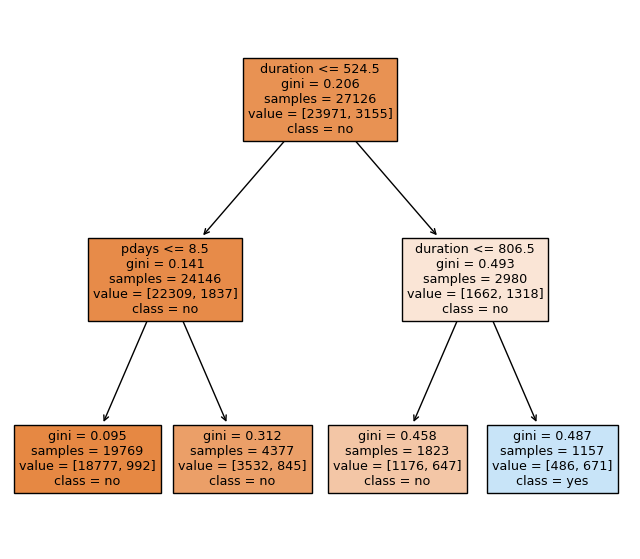

In [45]:
plt.figure(figsize=(8,7))

plot_tree(model,filled=True,class_names=['no','yes'],
        feature_names=['age', 'job', 'marital', 'education','default', 'balance', 'housing', 'loan','contact', 'day', 'marital', 'duration','campaign', 'pdays', 'previous', 'poutcome'])
plt.show()